In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import pearsonr

In [2]:
def scm_fit(X, y):
    """
    Fits a convex combination of the rows of X that minimizes the MSE
    Args:
        X (np.ndarray): Input features, shape (n_samples, n_features).
        y (np.ndarray): Target values, shape (n_samples,).
    Returns:
        np.ndarray: Optimized weights, shape (n_features).
    """
    n_features = X.shape[1]

    # Objective function: Mean Squared Error
    def objective_function(weights):
        y_predicted = np.dot(X, weights)
        return np.mean((y_predicted - y) ** 2)

    # Constraint: sum(weights) == weight_sum_constraint
    def sum_constraint(weights):
        return np.sum(weights) - 1
    
    def pearsonr_weights(weights):
        y_predicted = np.dot(X, weights)
        return float(pearsonr(y, y_predicted).statistic)

    # Bounds: Ensure all weights are nonnegative
    bounds = [(0, 1)] * n_features

    # Initial guess for weights
    initial_weights = np.ones(n_features) / (n_features)

    # Define constraints as a dictionary
    constraints = ({'type': 'eq', 'fun': sum_constraint})

    # Use the minimize function to find the optimized weights
    result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract the optimized weights
    optimized_weights = result.x

    # Extract the MSE
    corr = pearsonr_weights(optimized_weights)

    return optimized_weights, corr


In [3]:
df = pd.read_csv('../data/estimates/SNAP_gap_estimates/snap_gap_estimates.csv', index_col = 0)
df

,YEAR,STATEFIPS,SNAP Gap
0,2006,1,0.744864
1,2006,2,0.795289
2,2006,4,0.810071
3,2006,5,0.703737
4,2006,6,0.883711
...,...,...,...
895,2023,51,0.755342
896,2023,53,0.697170
897,2023,54,0.581461
898,2023,55,0.687052


In [4]:
pivoted = df.pivot_table(values = "SNAP Gap", index = "YEAR", columns= "STATEFIPS")
pivoted

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.744864,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,...,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910,0.877172
2007,0.744663,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,...,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979,0.891130
2008,0.729857,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,...,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439,0.895059
2009,0.689102,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,...,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331,0.878470
2010,0.647219,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,...,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064,0.845516
2011,0.599665,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,...,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219,0.841567
2012,0.598476,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,...,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693,0.857272
2013,0.599004,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,...,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685,0.842479
2014,0.603580,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,...,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940,0.852181


In [5]:
training_data = pivoted[pivoted.index <= 2021]
training_data

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.744864,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,...,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910,0.877172
2007,0.744663,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,...,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979,0.891130
2008,0.729857,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,...,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439,0.895059
2009,0.689102,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,...,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331,0.878470
2010,0.647219,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,...,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064,0.845516
2011,0.599665,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,...,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219,0.841567
2012,0.598476,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,...,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693,0.857272
2013,0.599004,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,...,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685,0.842479
2014,0.603580,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,...,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940,0.852181


In [6]:
training_y = training_data[25]
training_X = training_data.loc[:, training_data.columns != 25].values

In [7]:
weights, corr = scm_fit(training_X, training_y)
weights

array([6.66009906e-19, 6.51232151e-02, 3.42440919e-02, 1.12881478e-18,
       7.29012294e-02, 7.59987158e-02, 4.75059850e-18, 0.00000000e+00,
       6.47668789e-03, 1.78917075e-02, 5.96812274e-02, 6.78010082e-05,
       7.53271345e-02, 2.62975632e-18, 0.00000000e+00, 1.74883198e-19,
       1.23893453e-18, 2.71898952e-19, 2.44268255e-02, 7.28072672e-02,
       7.25405421e-03, 2.77468356e-02, 8.12222027e-19, 3.03306557e-03,
       0.00000000e+00, 9.98879118e-03, 5.21680263e-02, 0.00000000e+00,
       9.86806851e-03, 1.12191296e-01, 3.88833311e-02, 3.74772135e-03,
       2.91768379e-02, 1.40401032e-02, 3.53110227e-02, 4.13694275e-19,
       2.85816488e-02, 1.70886781e-04, 8.68501268e-19, 4.90916319e-19,
       3.13260547e-19, 3.64804834e-18, 1.05578783e-02, 4.40037014e-03,
       2.19694157e-02, 1.48772908e-02, 4.90803234e-19, 4.81807354e-02,
       2.29067178e-02])

In [8]:
X = pivoted.loc[:, pivoted.columns != 25].values
y = pivoted[25]

In [9]:
synth = X @ weights
synth

array([0.81878695, 0.81923489, 0.8072514 , 0.77692748, 0.73471989,
       0.70909291, 0.69215154, 0.68760001, 0.69200824, 0.69358556,
       0.69691653, 0.70604947, 0.71051288, 0.73624499, 0.70148095,
       0.69651111, 0.68809113, 0.68003734])

In [10]:
diffs = y[-2:] - synth[-2:]
diffs

YEAR
2022   -0.057613
2023   -0.089747
Name: 25, dtype: float64

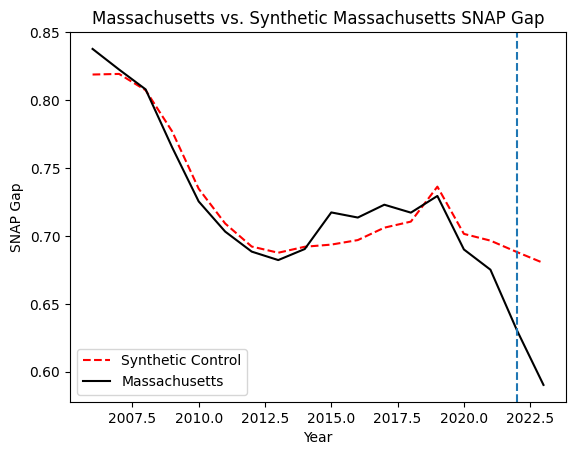

In [11]:
plt.plot(pivoted.index.astype(int), synth, label = "Synthetic Control", linestyle = '--', color = 'red')
plt.plot(pivoted.index.astype(int), y, label = "Massachusetts", linestyle = '-', color = 'black')
plt.axvline(x = 2022, linestyle = '--')
plt.legend()
plt.title("Massachusetts vs. Synthetic Massachusetts SNAP Gap")
plt.xlabel("Year")
plt.ylabel("SNAP Gap")
plt.savefig('../output/synthetic_control_plots/no_covariates_real_vs_synthetic.png')

In [12]:
non_zero_weights = np.where(weights>0.00000000001)
non_zero_weights = non_zero_weights[0]

In [13]:
import us

def fips_to_state(fips_code, return_type='abbr'):
    """
    Converts a state FIPS code to its corresponding state abbreviation or name.

    Args:
        fips_code (str): A two-digit FIPS code representing a state.
        return_type (str, optional): Specifies the return type, either 'abbr' for abbreviation (default) or 'name' for full name.

    Returns:
        str: The state abbreviation or name corresponding to the FIPS code.
             Returns None if the FIPS code is invalid.
    """
    fips_code = str(fips_code)
    if len(fips_code) == 1:
        fips_code = '0' + fips_code
    state = us.states.lookup(fips_code)
    if state:
        if return_type == 'abbr':
            return state.abbr
        elif return_type == 'name':
            return state.name
        else:
             raise ValueError("Invalid return_type. Choose 'abbr' or 'name'.")
    return None


In [14]:
synthetic_cols = training_data.columns.to_list()
synthetic_cols.remove(25)

In [15]:
non_zero_weights_dict = {}

for state in non_zero_weights:
    weight = weights[state]
    state = synthetic_cols[state]
    state_name = fips_to_state(state, 'name')
    non_zero_weights_dict[state_name] = float(weight)

In [16]:
non_zero_weights_dict

{'Alaska': 0.06512321513844678,
 'Arizona': 0.034244091850379944,
 'California': 0.07290122940219924,
 'Colorado': 0.07599871575338742,
 'Florida': 0.006476687890682575,
 'Georgia': 0.01789170745236788,
 'Hawaii': 0.05968122744342084,
 'Idaho': 6.780100818835525e-05,
 'Illinois': 0.07532713450324646,
 'Maine': 0.024426825512025838,
 'Maryland': 0.07280726723549744,
 'Michigan': 0.0072540542082450395,
 'Minnesota': 0.02774683560206714,
 'Missouri': 0.0030330655671052618,
 'Nebraska': 0.009988791180157202,
 'Nevada': 0.05216802625440352,
 'New Jersey': 0.00986806850651818,
 'New Mexico': 0.11219129550669411,
 'New York': 0.038883331130841324,
 'North Carolina': 0.0037477213496459796,
 'North Dakota': 0.02917683792066922,
 'Ohio': 0.014040103173466989,
 'Oklahoma': 0.035311022672159235,
 'Pennsylvania': 0.02858164876532416,
 'Rhode Island': 0.0001708867808477817,
 'Utah': 0.010557878341390808,
 'Vermont': 0.004400370141298024,
 'Virginia': 0.021969415746601727,
 'Washington': 0.0148772908

In [17]:
pivoted[pivoted.index <= 2021].loc[:, (training_data.columns != state) & (training_data.columns != 25)]

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,45,46,47,48,49,50,51,53,54,55
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.744864,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,...,0.727245,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910
2007,0.744663,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,...,0.725394,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979
2008,0.729857,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,...,0.710361,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439
2009,0.689102,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,...,0.673466,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331
2010,0.647219,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,...,0.636254,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064
2011,0.599665,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,...,0.622304,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219
2012,0.598476,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,...,0.605679,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693
2013,0.599004,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,...,0.610242,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685
2014,0.603580,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,...,0.630492,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940


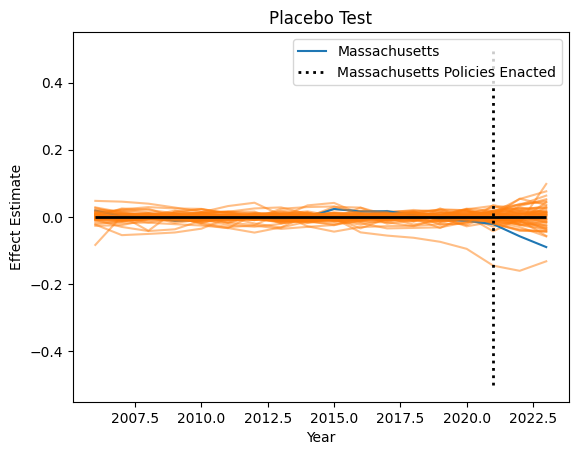

In [ ]:
def run_trial(state):
    training_data = pivoted[pivoted.index <= 2021]
    training_y = training_data[state]
    training_X = training_data.loc[:, (training_data.columns != state) & (training_data.columns != 25)].values
    weights, corr = scm_fit(training_X, training_y)
    X = pivoted.loc[:, (pivoted.columns != state) & (pivoted.columns != 25)].values
    y = pivoted[state]
    synth = X @ weights
    diffs = y - synth
    return diffs, corr

diff_dict = {}
corrs = {}

for state in pivoted.columns: 
    diffs, corr = run_trial(state)
    diff_dict[state] = diffs
    corrs[state] = corr
    
    is_mass = state == 25
    
    plt.plot(diffs,
             color="C0" if is_mass else "C1",
             alpha=1 if is_mass else 0.5,
             label="Massachusetts" if is_mass else None)

plt.hlines(y=0, xmin=2006, xmax=2023, lw=2, color="Black")
plt.vlines(x=2021, ymin=-0.5, ymax=0.5, linestyle=":", lw=2, label="Massachusetts Policies Enacted", color="Black")
plt.ylabel("Effect Estimate")
plt.title("Placebo Test")
plt.xlabel("Year")
plt.legend()

In [64]:
effects_df = pd.DataFrame(diff_dict).T
effects_df['corr'] = None
for state in corrs.keys():
    effects_df.loc[state, 'corr'] = corrs[state]
effects_df

YEAR,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,corr
1,0.009168,0.002819,0.007090,-0.001010,0.005035,-0.017479,-0.000010,0.001732,-0.005766,-0.001701,-0.010277,-0.000405,0.000648,0.000370,0.002774,0.006754,0.010803,0.007774,0.994231
2,-0.003517,-0.009743,0.001423,0.008641,0.012523,-0.004185,-0.003149,-0.015210,-0.000764,0.030082,0.027688,-0.002055,-0.022698,-0.010368,-0.013908,-0.000771,-0.018741,0.098200,0.904835
4,0.005167,0.010021,0.004308,-0.002194,-0.018568,-0.000169,-0.007336,0.003423,0.009277,0.011771,0.004693,-0.007175,0.003596,0.006927,0.000502,-0.014953,0.000987,-0.017421,0.987383
5,-0.026505,-0.024500,-0.007641,-0.001986,0.003057,0.006536,0.005412,0.006551,-0.009285,0.001508,0.003146,0.015975,0.017703,-0.014446,-0.004717,0.012997,0.053351,0.076193,0.94561
6,0.001255,-0.005063,-0.006460,-0.002200,0.011237,0.016458,0.008708,0.007833,0.002571,-0.000749,0.001982,0.006777,0.004162,-0.001971,-0.027928,-0.014277,-0.030216,-0.057977,0.97297
8,-0.002179,-0.000973,0.005703,0.003689,0.004976,0.005921,0.000314,-0.001588,0.002980,0.008413,0.013212,0.009759,0.005633,-0.007240,-0.013306,-0.021545,-0.037157,-0.043122,0.97198
9,-0.003715,-0.005459,-0.002630,0.009328,0.002718,0.005038,0.009341,0.004156,-0.009399,-0.009964,-0.023079,-0.008398,0.001815,-0.001261,0.003351,0.016046,0.017206,0.011815,0.985488
10,0.004103,-0.004163,0.002349,-0.000638,0.010299,-0.001109,-0.009580,0.007303,-0.007066,0.004197,-0.014422,-0.016060,-0.027583,-0.003698,0.022824,0.032932,0.007749,0.020641,0.97948
12,-0.000059,0.025252,0.020750,0.010828,0.001613,-0.005686,-0.003563,-0.017683,-0.012144,-0.024708,-0.001323,0.018000,-0.012779,0.025321,-0.004209,0.002114,0.054359,0.036049,0.989043
13,-0.001857,-0.000407,0.010320,0.006265,-0.001547,-0.000960,-0.005057,-0.004626,-0.011718,0.004230,-0.000748,0.003565,0.003737,0.012039,-0.000413,-0.010165,-0.007310,0.015457,0.995265


In [65]:
effects_df.columns

Index([  2006,   2007,   2008,   2009,   2010,   2011,   2012,   2013,   2014,
         2015,   2016,   2017,   2018,   2019,   2020,   2021,   2022,   2023,
       'corr'],
      dtype='object', name='YEAR')

In [81]:
pre_to_post = effects_df[2023] - effects_df[2021]
pre_post_diff = pd.DataFrame(pre_to_post).rename(columns = {0: 'difference'})
pre_post_diff['corr'] = effects_df['corr']
pre_post_diff['absolute_diff'] = pre_post_diff['difference'].abs()
pre_post_diff.sort_values('absolute_diff', ascending=False, inplace = True)
pre_post_diff.index.name = "STATEFIPS"
pre_post_diff

,difference,corr,absolute_diff
STATEFIPS,,,
2,0.098970,0.904835,0.098970
24,0.072650,0.982864,0.072650
25,-0.068347,0.968243,0.068347
15,0.063884,0.986245,0.063884
5,0.063196,0.94561,0.063196
32,-0.045660,0.970657,0.045660
47,0.045466,0.984527,0.045466
6,-0.043700,0.97297,0.043700
23,-0.036908,0.9487,0.036908
